<a href="https://colab.research.google.com/github/ShvetsovEgor/ML/blob/main/%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA_%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

In [9]:
from matplotlib import rc
rc('animation', html='html5')

In [4]:
def function_2d(x, y):
    # YOUR CODE HERE
    return 13 * (x ** 3) - 7 * x * y + (y ** 2) + 2 * (y ** 3) - 97

def gradient_2d(x, y):
    # YOUR CODE HERE
    return 39 * (x ** 2) - 7 * y, - 7 * x + 2 * y + 6 * (y ** 2)

def step(point, learning_rate):
    # YOUR CODE HERE
    gr = gradient_2d(*point)
    return point[0] - learning_rate * gr[0], point[1] - learning_rate * gr[1]

def gradient_descent_alg(x_0, y_0, learning_rate, num_steps):
    # YOUR CODE HERE
    history = [(x_0, y_0)]
    for _ in range(num_steps):
        history.append(step(history[-1], learning_rate))
    return history

**Проверьте на Python ваши ответы из теста к лекции (3 балла):**


Посчитайте значение градиента в точке 

In [6]:
gradient_2d(1, 2)

(25, 21)

Посчитайте одну итерацию (x, y) градиентного спуска.

In [9]:
x_0 = 1
y_0 = 2
learning_rate = 0.1
num_steps = 1
history = gradient_descent_alg(x_0, y_0, learning_rate, num_steps)
x, y = history[-1]
x, y

(-1.5, -0.10000000000000009)


Посчитайте значение градиента в точке (x, y).


In [10]:
gradient_2d(x, y)

(88.45, 10.360000000000001)

Посчитайте вторую итерацию (x, y) градиентного спуска.

In [12]:
x_0 = 1
y_0 = 2
learning_rate = 0.1
num_steps = 2
history = gradient_descent_alg(x_0, y_0, learning_rate, num_steps)
x, y = history[-1]
x, y

(-10.345, -1.1360000000000003)

**Запустите 10 шагов и посмотрите на полученные значения — списком или на графике. Сделайте вывод о сходимости (для этого можно выводить значения градиента на каждом шаге) (3 балла).**

In [31]:
x_0 = 1
y_0 = 2
learning_rate = 0.1
num_steps =7
history = gradient_descent_alg(x_0, y_0, learning_rate, num_steps)

for el in history:
    x, y = el
    print(gradient_2d(x, y))


(25, 21)
(88.45, 10.360000000000001)
(4181.693975000001, 77.885976)
(7161421.4379099365, 3459.642241231556)
(20025466821375.17, 5770961.284380308)
(1.5639764727884235e+26, 16018528700061.14)
(9.539487389001748e+51, 1.2487395989798227e+26)
(3.549070966152012e+103, 7.613251523937637e+51)


Градиентный спуск не сходится, так как значение градиента не уменьшается.
После 7го шага операции над большими числами с плавающей точкой приводят к ошибке ***OverflowError: (34, 'Numerical result out of range')***

**Найдите аналитически значение оптимума для функции z. Это локальный минимум — градиентный спуск такие значения может проскакивать. (4 балла)**

Оптимум -97,21 достигается в точке M(0.2762, 0.425)
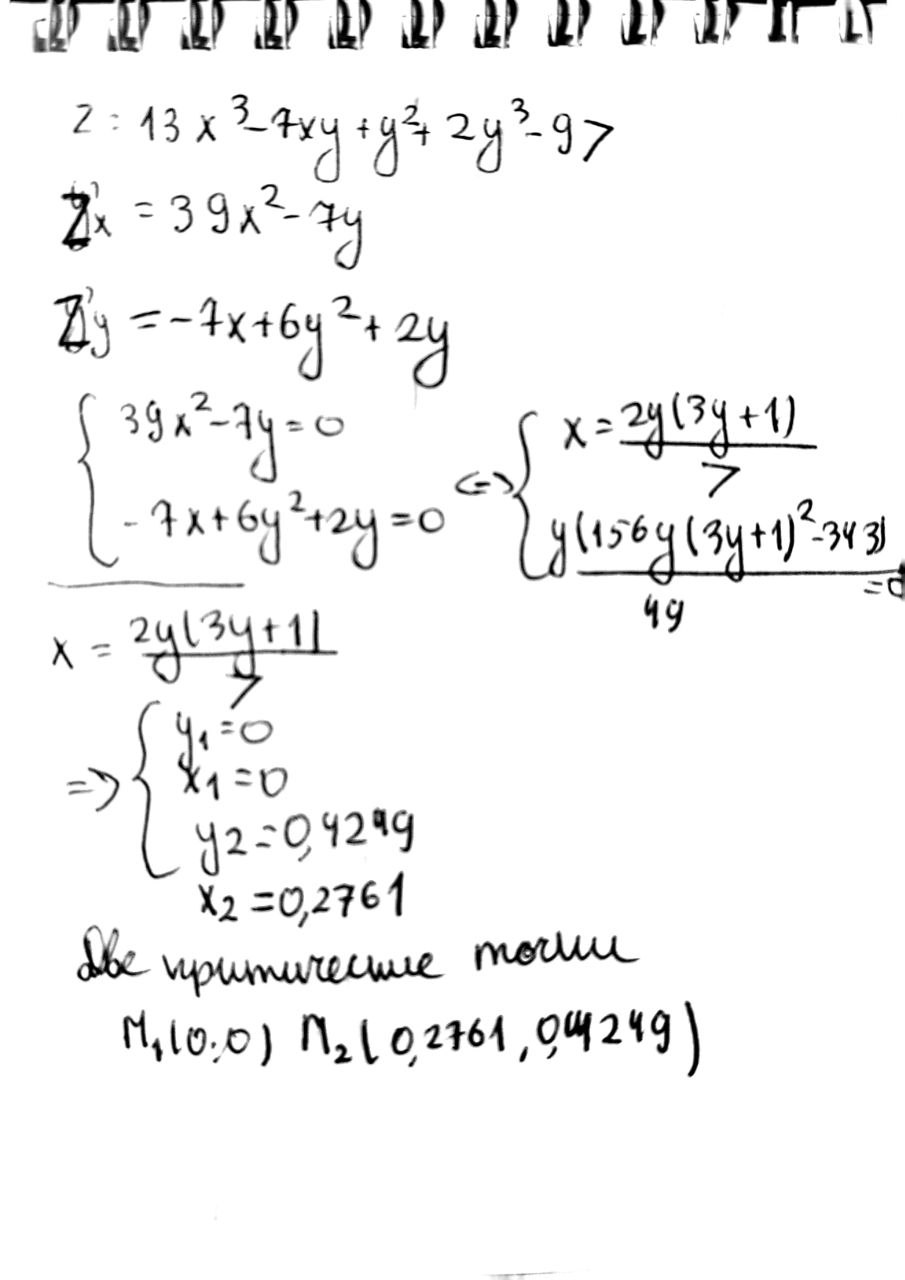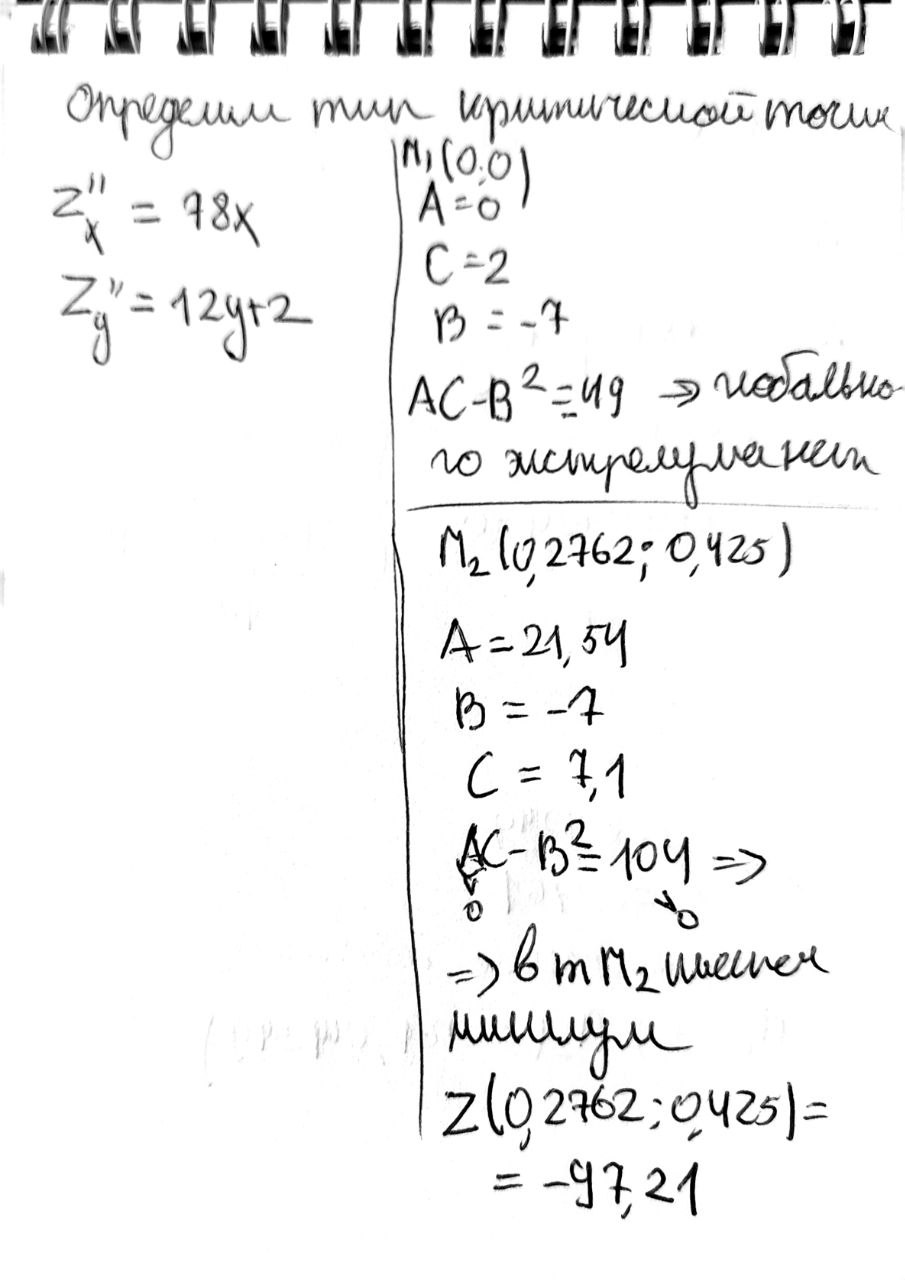

Предложите свою функцию от одной переменной y=f(x) с несколькими минимумами. Найдите минимумы аналитически и отметьте их на графике функции. (5 баллов)
y = x^4 - 2x^2
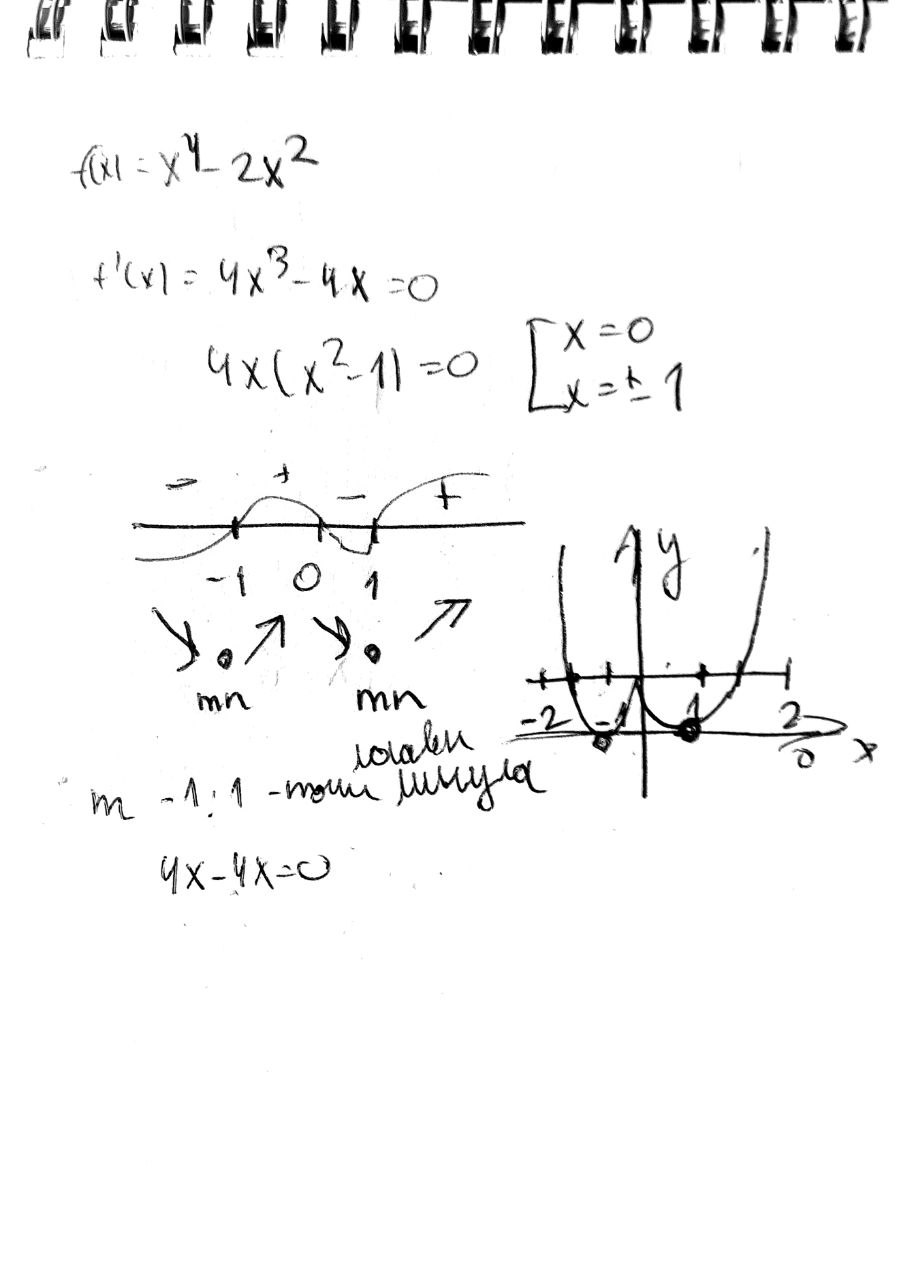

**Запустите градиентный спуск из разных точек — так, чтобы алгоритм находил разные минимумы (хотя бы два). (5 баллов)**

In [10]:
def function_1d(x):
    # YOUR CODE HERE
    return x ** 4 - x ** 2

def gradient_1d(x):
    # YOUR CODE HERE
    return 4 * (x ** 3) - 4 * x

def step(x, learning_rate):
    # YOUR CODE HERE
    return x - learning_rate * gradient_1d(x)

def gradient_descent_alg(x_0, learning_rate, num_steps):
    # YOUR CODE HERE
    history = [x_0]
    for _ in range(num_steps):
        history.append(step(history[-1], learning_rate))
    return history

In [ ]:
X_1d = np.arange(-2, 2, 0.02)
Y_1d = function_1d(X_1d)
x_0 = 1.4
num_steps = 20
x_history = np.array(
    gradient_descent_alg(x_0=x_0, learning_rate=0.04, num_steps=num_steps)
)
y_history = function_1d(x_history)

fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(1, 1, 1)


def animate(i):
    ax.clear()
    ax.plot(X_1d, Y_1d, 'k-', linewidth=0.5)
    ax.plot(x_history[:i], y_history[:i], 'rx-', linewidth=1, zorder=10)
 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Градиентный спуск из точки {x_0}')
 
 
animation.FuncAnimation(fig, animate, num_steps, interval=400, blit=False)

In [ ]:
X_1d = np.arange(-2, 2, 0.02)
Y_1d = function_1d(X_1d)
x_0 = -1.9
num_steps = 20
x_history = np.array(
    gradient_descent_alg(x_0=x_0, learning_rate=0.04, num_steps=num_steps)
)
y_history = function_1d(x_history)

fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(1, 1, 1)


def animate(i):
    ax.clear()
    ax.plot(X_1d, Y_1d, 'k-', linewidth=0.5)
    ax.plot(x_history[:i], y_history[:i], 'rx-', linewidth=1, zorder=10)
 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Градиентный спуск из точки {x_0}')
 
 
animation.FuncAnimation(fig, animate, num_steps, interval=400, blit=False)

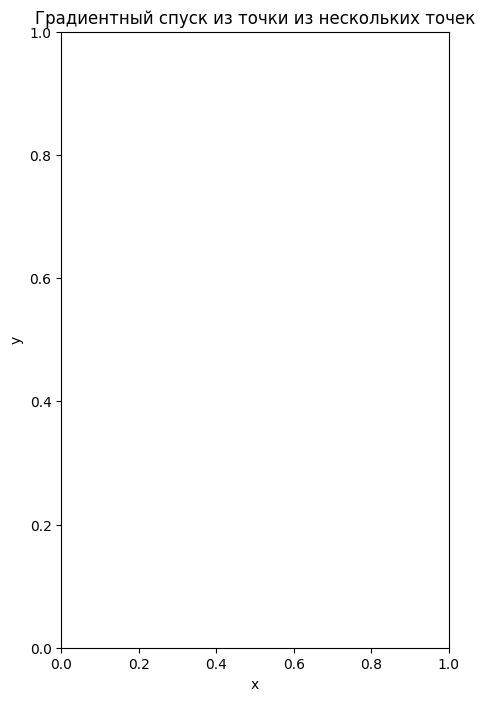

In [33]:
X_1d = np.arange(-2, 2, 0.02)
Y_1d = function_1d(X_1d)
x_0 = -1.4
num_steps = 20
x_history_1 = np.array(
    gradient_descent_alg(x_0=x_0, learning_rate=0.04, num_steps=num_steps)
)
y_history_1 = function_1d(x_history)


X_1d = np.arange(-2, 2, 0.02)
Y_1d = function_1d(X_1d)
x_0 = 1.4
num_steps = 20
x_history_2 = np.array(
    gradient_descent_alg(x_0=x_0, learning_rate=0.04, num_steps=num_steps)
)
y_history_2 = function_1d(x_history)
ig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(1, 1, 1)


def animate(i):
    ax.clear()
    ax.plot(X_1d, Y_1d, 'k-', linewidth=0.5)
    ax.plot(x_history_1[:i], y_history_1[:i], 'rx-', linewidth=1, zorder=10)
    ax.plot(x_history_2[:i], y_history_2[:i], 'rx-', linewidth=1, zorder=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Градиентный спуск из точки из нескольких точек')
 
 
animation.FuncAnimation(fig, animate, num_steps, interval=400, blit=False)